<a href="https://colab.research.google.com/github/Imran1910276131/AI_Assignment3.2/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import necessary Library

In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
import random
import numpy as np

#Generating Data

In [2]:
def data_generator(n):
    X = np.random.randint(-20, 20, size=n, dtype=int)
    Y = 5*X**3 - 68*X**2 - 7*X + 1
    return X, Y

#Determining the DNN Model

In [3]:
def DNN_Model():
	inputs = layers.Input(shape=(1))
	x = layers.Dense(32, activation='relu')(inputs)
	x = layers.Dense(64, activation='relu')(x)
	x = layers.Dense(128, activation='relu')(x)
	outputs = layers.Dense(1)(x)

	model = Model(inputs=inputs, outputs=outputs)

	return model

#Normalizing Data from -1 to +1

In [5]:

data_x, data_y = data_generator(5000)
x_min = np.min(data_x)
x_max = np.max(data_x)
y_min = np.min(data_y)
y_max = np.max(data_y)

data_x = 2 * ((data_x - x_min) / (x_max - x_min)) - 1
data_y = 2 * ((data_y - y_min) / (y_max - y_min)) - 1

length=int(len(data_x))

train_x = data_x[:int(length*.9)]
train_y = data_y[:int(length*.9)]

val_x = data_x[int(length*.9):int(length*.95)]
val_y = data_y[int(length*.9):int(length*.95)]

test_x = data_x[int(length*.95):]
test_y = data_y[int(length*.95):]

#Model Compling and Training

In [6]:
model = DNN_Model()
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss="mean_squared_error", metrics=[tf.keras.metrics.R2Score()])
history = model.fit(train_x, train_y, epochs=10, validation_data=(val_x, val_y))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
141/141 [==============================] - 2s 4ms/step - loss: 0.0552 - r2_score: 0.7541 - val_loss: 0.0011 - val_r2_score: 0.9947
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 8.0541e-04 - r2_score: 0.9964 - val_loss: 5.3732e-04 - val_r2_score: 0.9974
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 3.8135e-04 - r2_score: 0.9983 - val_loss: 3.0764e-04 - val_r2_score: 0.9985
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 2.4315e-04 - r2_score: 0.9989 - val_loss: 2.0044e-04 - val_r2_score: 0.9990
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 1.7781e-04 - r2_score: 0.9992 - val_loss: 1.6238e-04 - val_r2_score: 0.9992
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 1.1444e-04 - r2_score: 0.9995 - val_loss: 1.5705e-04 - val_r2_score: 0.9992
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 8.4310e-05 - r2_score: 0.9996 - va

#Predicted Result on Test Data

In [7]:

pred_y = model.predict(test_x)

8/8 [==============================] - 0s 2ms/step


#Denormalizing Test Data and Predicted Output

In [8]:
test_x = ((test_x + 1) * (x_max - x_min) / 2) + x_min
test_y = ((test_y + 1) * (y_max - y_min) / 2) + y_min
pred_y = ((pred_y + 1) * (y_max - y_min) / 2) + y_min

#Using the Test Data for prediction

In [11]:
print('Actual X Value: ', test_x[0])
print('Actual Y Value: ', test_y[0])
print('Predicted Y Value: ', pred_y[0])

Actual X Value:  -15.0
Actual Y Value:  -32069.0
Predicted Y Value:  [-31975.33140528]


#Plotting the training accuracy vs validation accuracy and training error vs validation error curves and also plotting the prediction accuracy vs true levels of the Test Data.

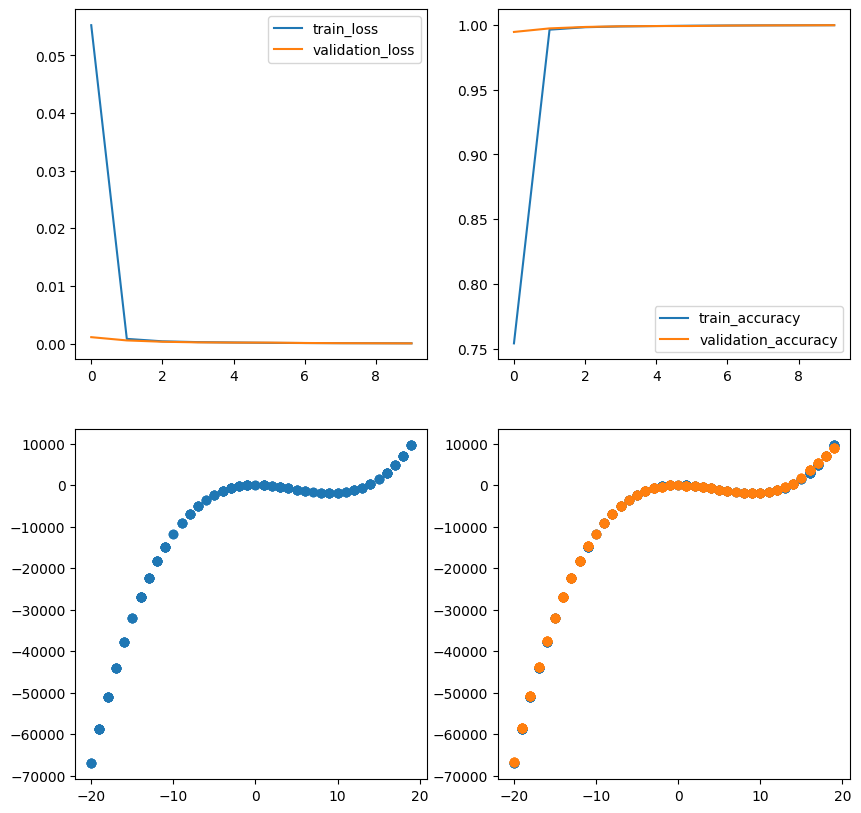

In [12]:
performance_dict = history.history
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
plt.plot(performance_dict['loss'])
plt.plot(performance_dict['val_loss'])
plt.legend(['train_loss', 'validation_loss'])

plt.subplot(2,2,2)
plt.plot(performance_dict['r2_score'])
plt.plot(performance_dict['val_r2_score'])
plt.legend(['train_accuracy', 'validation_accuracy'])

plt.subplot(2,2,3)
plt.scatter(test_x, test_y)

plt.subplot(2,2,4)
plt.scatter(test_x, test_y)
plt.scatter(test_x, pred_y)

plt.show()